# Loading Data and Perform a quick profiling

The data is from the Lending Club (P2P loan) consumer lending data

In [73]:
import pandas as pd
import matplotlib as plt

file_path = "./data/loan_data_2007_2014.csv"
df = pd.read_csv(filepath_or_buffer = file_path)

/var/folders/rp/svy321qd3lv_hlkfndpyd3hr0000gn/T/ipykernel_1987/1638303398.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer = file_path)


In [74]:
pd.options.display.max_columns = None
df.head(5) # taking a sneak peak on the data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Check the features to see percentage null values

Look at data that is 80% null, and make a decision to see if they can all be dropped.

In [76]:
s_no_value_pct = df.isnull().mean().sort_values(ascending=False)
s_no_value_pct[s_no_value_pct>0.8]

inq_last_12m                 1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
dti_joint                    1.000000
total_bal_il                 1.000000
annual_inc_joint             1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
mths_since_last_record       0.865666
dtype: float64

In [77]:
col_to_exclude = s_no_value_pct[s_no_value_pct > 0.8].index.to_list() # list columns that are mostly nulls
col_to_exclude

['inq_last_12m',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'dti_joint',
 'total_bal_il',
 'annual_inc_joint',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'mths_since_last_record']

In [78]:
df.drop(col_to_exclude, axis=1, inplace=True)

## Drop single value columns

In [79]:
def identify_single_value_columns(df):
    """
    Identify columns in a DataFrame that contain only one unique value.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    single_value_columns (list): List of column names with only one unique value.
    """
    single_value_columns = []

    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_columns.append(col)

    return single_value_columns

single_value_columns = identify_single_value_columns(df)
print(single_value_columns)

['policy_code', 'application_type']


In [80]:
df.drop(single_value_columns, axis=1, inplace=True)

## Setup Target Variable

Define a target variable for prediction.

In [81]:
# take a look at the loan_status column and decide on the prediction variable.
df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [82]:
# Making an assumption here, assuming we are predicting anything charged off
default_loan_status = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
early_dlq = ["In Grace Period", "Late (16-30 days)"]

df['label'] = df.loan_status.map(lambda x: 1 if x in default_loan_status else 0)
df['early_dlq'] = df.loan_status.map(lambda x: 1 if x in early_dlq else 0)

df.drop(['loan_status', 'early_dlq'], axis = 1, inplace=True)

# Preprocessing

Clean up update, creating label column and drop columns

In [83]:
# look at the columns again, and drop columns which may not make sene
print(f"{len(df.columns.tolist())} columns left")


54 columns left


In [84]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,label
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,0


## Drop Additional Columns

Dropping for simplicity, but they may be useful for further analysis.

- Free Text 
- Already in collection
- Address information
- Identity columns

In [85]:
free_text_columns = ['url', 'desc', 'title'] # dropping some free text columns
future_events = ['recoveries', 'next_pymnt_d', 'collection_recovery_fee', 'collections_12_mths_ex_med'] # dropping future events or events after default
location_info = ['zip_code', 'addr_state']
identity_columns = ['id', 'member_id']

In [86]:
df.drop(free_text_columns + future_events + location_info + identity_columns, axis = 1, inplace = True) # drop irrelavent columns

In [87]:
# look at the columns again, and drop columns which may not make sene
print(f"{len(df.columns.tolist())} columns left")

43 columns left


## Take a look at all string data

In [88]:
df.select_dtypes(include=[object]).head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,n,credit_card,Jan-85,f,Jan-15,Jan-16
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,n,car,Apr-99,f,Apr-13,Sep-13
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,n,small_business,Nov-01,f,Jun-14,Jan-16
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,n,other,Feb-96,f,Jan-15,Jan-15
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,n,other,Jan-96,f,Jan-16,Jan-16


In [89]:
# looks like emp_title is free text as well, it is not these field are not useful, but let's ignore the processing for now.
print(df.emp_title.value_counts())
df.drop(['emp_title'], axis = 1, inplace = True)

Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley trucking and warehousing       1
save mart supermarkets                  1
Server Engineer Lead                    1
Name: emp_title, Length: 205475, dtype: int64


In [90]:
df.emp_length.value_counts() # looks like emp_length are ordinal

import re, numpy as np
def process_emp_length(x):
  if pd.isnull(x):
    return 0
  match = re.search(r'\d+', x)
  if match:
    return int(match.group())
  else:
    return 0

df["emp_length"] = df.emp_length.map(process_emp_length)

df.emp_length.value_counts()

10    150049
1      65887
2      41373
3      36596
5      30774
4      28023
7      26180
6      26112
8      22395
0      21008
9      17888
Name: emp_length, dtype: int64

In [91]:
df.pymnt_plan.map(lambda x : 0 if x.strip() == "n" else 1).value_counts()

0    466276
1         9
Name: pymnt_plan, dtype: int64

In [92]:
df["pymnt_plan"] = df.pymnt_plan.map(lambda x : 0 if x.strip() == "n" else 1) # it's either y or n, also only 9 y's
df.pymnt_plan.value_counts()

0    466276
1         9
Name: pymnt_plan, dtype: int64

## Converting data values to number of months
The practical way, considering Credit Risk typically get data monthly, will be taking number of months from a specific date.

In [111]:
date_columns = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']
df[date_columns].head()

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,426.0,98,60.0,48.0
1,252.0,98,82.0,77.0
2,221.0,98,68.0,48.0
3,291.0,98,60.0,60.0
4,292.0,98,48.0,48.0


In [109]:
# Function to convert the specified date format to months from today
def months_from_today(date_str):
    try:
        date_obj = pd.to_datetime(date_str + '-01', format="%b-%y-%d")
    except:
        #print(date_str)
        return np.nan

    today = pd.to_datetime('2020-01-01')
    months_difference = (today - date_obj).days // 30
    return months_difference


In [110]:
df[date_columns] = df[date_columns].applymap(months_from_today)

# Save Pre-processed Data

In [112]:
#pickle the data as this date function takes a lot of time.
df.to_pickle("./data/loan_data_processed.pickle")

# Feature Selection

Two techniques will be used in this case, one for numerical the other for categorical. We start by get the numerical and categorical columns first.# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [114]:
# first divide training data into categorical and numerical subsets
cat_columns = df.select_dtypes(include = "object").columns.tolist()
num_columns = df.select_dtypes(include = 'number').columns.tolist()

print(cat_columns)

print(num_columns)

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'issue_d', 'pymnt_plan', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'label']


In [117]:
df[cat_columns].describe()

,term,grade,sub_grade,home_ownership,verification_status,purpose,initial_list_status
count,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,6,3,14,2
top,36 months,B,B3,MORTGAGE,Verified,debt_consolidation,f
freq,337953,136929,31686,235875,168055,274195,303005


In [118]:
df[num_columns].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,issue_d,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,label
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466285.000000,466285.000000,466256.000000,466256.000000,466256.000000,215934.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,465909.000000,466285.000000,466243.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05,466285.000000
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,5.801081,7.327738e+04,77.038135,0.000019,17.218758,0.284678,267.878123,0.804745,34.104430,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,56.469014,3123.913796,52.126288,42.852547,0.004002,1.919135e+02,1.388017e+05,3.037909e+04,0.109307
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,3.645496,5.496357e+04,14.572917,0.004393,7.851121,0.797365,95.344947,1.091598,21.778487,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,13.128413,5554.737393,9.867676,21.662591,0.068637,1.463021e+04,1.521147e+05,3.724713e+04,0.312024
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,1.896000e+03,61.000000,0.000000,0.000000,0.000000,-596.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,48.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,2.000000,4.500000e+04,67.000000,0.000000,11.360000,0.000000,211.000000,0.000000,16.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,48.000000,312.620000,48.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04,0.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.000000,6.300000e+04,73.000000,0.000000,16.870000,0.000000,253.000000,0.000000,31.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,49.000000,545.960000,48.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,0.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,10.000000,8.896000e+04,83.000000,0.000000,22.780000,0.000000,314.000000,1.000000,49.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,60.000000,3187.510000,50.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,10.000000,7.500000e+06,153.000000,1.000000,39.990000,29.000000,620.000000,33.000000,188.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,147.000000,36234.440000,154.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [120]:
df.pymnt_plan.value_counts()

0    466276
1         9
Name: pymnt_plan, dtype: int64

In [122]:
num_columns.remove("pymnt_plan")
num_columns.remove("label")
cat_columns.append("pymnt_plan")

## Feature Selection for Numerical Values

For numerical values we use f_regression function provided.

The F-value is a number that tells us if the differences between groups in our data are significant. In feature selection, it helps decide which features are important for our model. A higher F-value for a feature means it's likely more relevant for predicting the outcome.

### Handle NA values

In [145]:
s_na_analysis = df[num_columns].isna().mean().sort_values(ascending = False) 
s_na_analysis[s_na_analysis>0]

last_pymnt_d          0.000806
revol_util            0.000729
last_credit_pull_d    0.000090
delinq_2yrs           0.000062
total_acc             0.000062
pub_rec               0.000062
open_acc              0.000062
inq_last_6mths        0.000062
earliest_cr_line      0.000062
acc_now_delinq        0.000062
annual_inc            0.000009
dtype: float64

In [135]:
# assuming the smaller the worse, na would be never, se can fill na to a large number

df[["mths_since_last_major_derog", "label"]][df.mths_since_last_major_derog>0].sort_values(by = "mths_since_last_major_derog") 

,mths_since_last_major_derog,label
421696,1.0,0
99447,1.0,0
113950,1.0,0
261732,1.0,0
249475,1.0,0
...,...,...
86709,165.0,0
243781,169.0,0
385046,170.0,0
392664,180.0,0


In [137]:
df.mths_since_last_major_derog.fillna(99999, inplace=True)
df.mths_since_last_delinq.fillna(99999, inplace=True)

In [143]:
df[['total_rev_hi_lim','tot_cur_bal', 'tot_coll_amt']].mean()

total_rev_hi_lim     30379.087771
tot_cur_bal         138801.713385
tot_coll_amt           191.913517
dtype: float64

In [144]:
for col in ['total_rev_hi_lim','tot_cur_bal', 'tot_coll_amt']:
    df[col].fillna(df[col].mean(), inplace = True)

In [149]:
df.fillna(0, inplace=True)

### Display F-Score

In [150]:
from sklearn.feature_selection import SelectKBest, f_regression

F_values, p_values = f_regression(df[num_columns], df['label'].ravel())

In [154]:
# Create a DataFrame to store F-values and p-values for each feature
feature_stats_df = pd.DataFrame({'Feature': num_columns, 'F-value': F_values, 'p-value': p_values})

# Sort features based on F-values in descending order
sorted_features = feature_stats_df.sort_values(by='F-value', ascending=False)

# Print the sorted features
print("Sorted features based on F-values:")
print(sorted_features)

Sorted features based on F-values:
                        Feature       F-value        p-value
22              total_rec_prncp  32123.444376   0.000000e+00
25                 last_pymnt_d  26388.329134   0.000000e+00
21              total_pymnt_inv  18464.519835   0.000000e+00
20                  total_pymnt  18320.936906   0.000000e+00
3                      int_rate  14276.559279   0.000000e+00
26              last_pymnt_amnt  13547.497437   0.000000e+00
18                    out_prncp  12043.314244   0.000000e+00
19                out_prncp_inv  12041.196734   0.000000e+00
24           total_rec_late_fee  10406.218543   0.000000e+00
27           last_credit_pull_d   8835.580641   0.000000e+00
7                       issue_d   3666.819707   0.000000e+00
11               inq_last_6mths   2504.961272   0.000000e+00
6                    annual_inc   1162.043924  2.232388e-254
16                   revol_util   1156.416542  3.704754e-253
8                           dti   1081.383946  6.8

In [159]:
# take top 20, and ignore high p-values (>0.05)
selected_features = sorted_features[sorted_features['p-value'] < 0.05].head(20).Feature.tolist()

print(selected_features)
selected_features.append('label')

['total_rec_prncp', 'last_pymnt_d', 'total_pymnt_inv', 'total_pymnt', 'int_rate', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_credit_pull_d', 'issue_d', 'inq_last_6mths', 'annual_inc', 'revol_util', 'dti', 'tot_cur_bal', 'earliest_cr_line', 'total_rev_hi_lim', 'total_rec_int', 'total_acc']


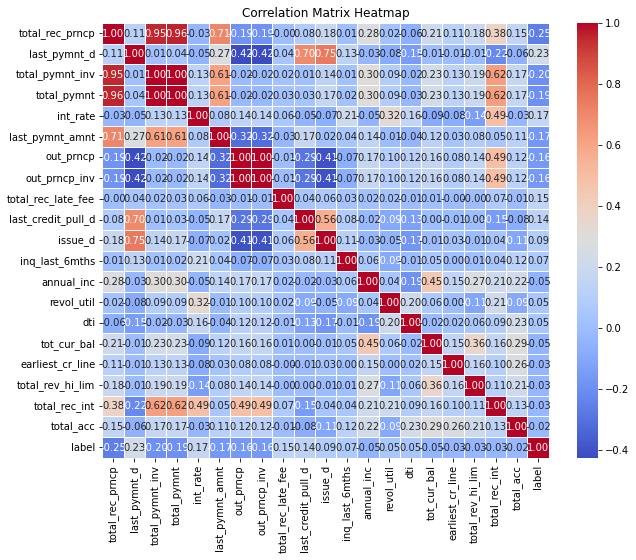

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming df contains your dataset)
# Replace this with your dataset
# df = pd.read_csv('your_dataset.csv')

# Create a subset of the dataframe with the selected features
subset_df = df[selected_features]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Drop closely correlated features

If two features are closely correlcated, drop one of them and pick the one with highest f-score

In [185]:
# Set the correlation threshold (e.g., 0.7)
correlation_threshold = 0.7

# Find and eliminate highly correlated features
correlation_matrix = subset_df.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]

print(f"Columns to drop:\n{to_drop}")

# Drop the highly correlated features
subset_df_filtered_num = subset_df.drop(columns=to_drop)


#final numerical columns
num_columns_final = subset_df_filtered_num.columns.tolist()

# Display the remaining features
print("Remaining features after eliminating highly correlated features:")
print(num_columns_final)

Columns to drop:
['grade']
Remaining features after eliminating highly correlated features:
['sub_grade', 'purpose', 'term', 'home_ownership', 'initial_list_status', 'verification_status', 'pymnt_plan']


## Feature Selection for Categorical Variables

With categorical variables, we need to use Chi2 or other means. The binary values are also treated as categorical variables here. For discrete values (emp_length for example), as they are ranked, it is still valid to use f_score as part of the selection. 

Similarly, chi2 will also produce value and p-value. We select highest value and lowest p-value in this case.


The chi-squared (χ²) statistic is a measure used in statistics to determine the association or independence between categorical variables in a contingency table. It's widely used for feature selection and in hypothesis testing, especially for analyzing categorical data.

Here's a breakdown of how the chi-squared statistic is calculated and its significance:

1. **Contingency Table:**
   For two categorical variables, we construct a contingency table that shows the frequency or count of each combination of categories.

2. **Expected Frequencies:**
   Assuming the variables are independent, we calculate the expected frequency for each cell under the assumption of independence. This is typically computed as (row total * column total) / grand total.

3. **Chi-Squared Statistic:**
   The chi-squared statistic is computed using the observed and expected frequencies. The formula is:
   \[
   \chi² = \sum \frac{{(O_{ij} - E_{ij})²}}{{E_{ij}}}
   \]
   where \(O_{ij}\) is the observed frequency and \(E_{ij}\) is the expected frequency for cell \((i, j)\).

4. **Degrees of Freedom:**
   The degrees of freedom (\(df\)) for a chi-squared test is calculated as \((\text{{number of rows}} - 1) \times (\text{{number of columns}} - 1)\).

5. **P-value:**
   The chi-squared statistic is compared to a chi-squared distribution with the appropriate degrees of freedom to obtain a p-value. This p-value helps determine the statistical significance of the association.

6. **Interpretation:**
   - If the chi-squared statistic is large and the p-value is small (usually less than a chosen significance level, e.g., 0.05), we reject the null hypothesis of independence and conclude that there is a significant association between the variables.
   - If the chi-squared statistic is small and the p-value is large, we fail to reject the null hypothesis, suggesting that the variables are independent.

In feature selection, the chi-squared statistic can be used to evaluate the importance of features, particularly in the context of classification problems, where it helps identify features that are most relevant to the target variable. Features with higher chi-squared values are considered more informative or discriminatory for the target variable.

### Label Encoder

LabelEncoder is used to transform the target variable (if it's categorical) into numerical labels for the purpose of applying the chi-squared test to assess the relationship between the features (categorical) and the target variable. The chi-squared test itself is used to analyze the association between categorical variables.


In [164]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

df_cat = df[cat_columns].copy()

label_encoders = {}
for column in X_cat.columns:
    label_encoders[column] = LabelEncoder()
    df_cat[column] = label_encoders[column].fit_transform(df_cat[column])

chi2_values, p_values = chi2(df_cat, df.label)

In [166]:
# Create a DataFrame to store chi-squared values and p-values for each feature
chi2_df = pd.DataFrame({'Feature': df_cat.columns, 'Chi2 Value': chi2_values, 'P-value': p_values})

# Sort features based on chi-squared values in descending order
sorted_chi2_features = chi2_df.sort_values(by='Chi2 Value', ascending=False)

# Print sorted features based on chi-squared values and p-values
print("Features sorted based on chi-squared values and p-values:")
print(sorted_chi2_features)

Features sorted based on chi-squared values and p-values:
               Feature    Chi2 Value        P-value
2            sub_grade  51579.080657   0.000000e+00
1                grade  12272.236309   0.000000e+00
5              purpose   1916.278339   0.000000e+00
0                 term   1365.495348  6.613481e-299
3       home_ownership   1206.186066  2.759925e-264
6  initial_list_status    699.056435  4.796106e-154
4  verification_status    591.918865  9.583629e-131
7           pymnt_plan     10.382817   1.271935e-03


In [182]:
# take top 20, and ignore high p-values (>0.05)
selected_cat_features = sorted_chi2_features[sorted_features['p-value'] < 0.05].head(20).Feature.tolist()

print(selected_cat_features)

['sub_grade', 'grade', 'purpose', 'term', 'home_ownership', 'initial_list_status', 'verification_status', 'pymnt_plan']


/var/folders/rp/svy321qd3lv_hlkfndpyd3hr0000gn/T/ipykernel_1987/3032095689.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_cat_features = sorted_chi2_features[sorted_features['p-value'] < 0.05].head(20).Feature.tolist()


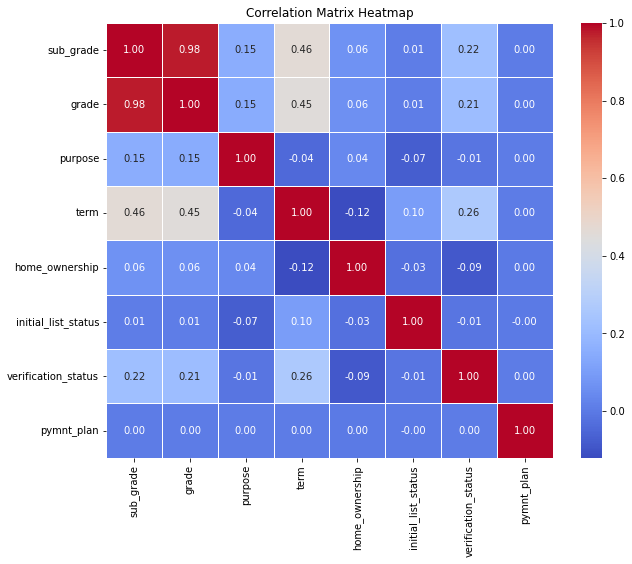

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a subset of the dataframe with the selected features
subset_df = df_cat[selected_cat_features]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Calculate Cramer V for each combination of variables


**Cramer's V: A Measure of Association for Categorical Variables**

Cramer's V is a statistical measure used to quantify the strength and direction of association between two categorical variables in a contingency table. It is an extension of the phi coefficient and is particularly useful for analyzing categorical data.

The formula to calculate Cramer's V is:

\[ V = \sqrt{\frac{{\chi^2}}{{n \times \text{{min}}(k-1, r-1)}}} \]

where:
- \( \chi^2 \) is the chi-squared statistic obtained from the chi-squared test of independence for the given contingency table.
- \( n \) is the total number of observations (the sum of all elements in the contingency table).
- \( k \) is the number of columns (categories) in the contingency table.
- \( r \) is the number of rows (categories) in the contingency table.

Here's how to interpret the values of Cramer's V:
- Cramer's V ranges from 0 to 1, where 0 indicates no association and 1 indicates a strong association.
- The closer the value is to 1, the stronger the association between the variables.
- Larger values signify a stronger association.

Interpretation of Cramer's V:
- \( V \) close to 0: Little to no association between the variables.
- \( V \) around 0.1: Small association.
- \( V \) around 0.3: Moderate association.
- \( V \) above 0.3: Strong association.

Cramer's V is a valuable tool for understanding the strength of association between categorical variables, making it useful in various fields such as social sciences, marketing, psychology, and more. It provides insights into the relationship between variables, aiding in decision-making and further analysis.


In [198]:
from itertools import combinations
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramer's V for correlation
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = np.sum(confusion_matrix.values)
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, (phi2 - ((k-1)*(r-1)) / (n-1)))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create combinations of selected features
feature_combinations = list(combinations(selected_cat_features, 2))

# Calculate Cramer's V for each feature combination
cramer_v_values = []
for combo in feature_combinations:
    confusion_matrix = pd.crosstab(subset_df[combo[0]], subset_df[combo[1]])
    cramer_v = cramers_v(confusion_matrix)
    cramer_v_values.append(cramer_v)

pd.DataFrame({"Combo": feature_combinations, "Cramer V": cramer_v_values})

,Combo,Cramer V
0,"(sub_grade, grade)",0.999970
1,"(sub_grade, purpose)",0.065785
2,"(sub_grade, term)",0.471304
3,"(sub_grade, home_ownership)",0.038420
4,"(sub_grade, initial_list_status)",0.048305
5,"(sub_grade, verification_status)",0.162162
6,"(sub_grade, pymnt_plan)",0.007748
7,"(grade, purpose)",0.092322
8,"(grade, term)",0.456532
9,"(grade, home_ownership)",0.033654


In [234]:
features = []

threshold = 0.7

print(selected_cat_features)
for idx, (c1, c2) in enumerate(feature_combinations):
    #print(idx, c1, c2)
    if cramer_v_values[idx] > threshold:    
        v1 = sorted_chi2_features[sorted_chi2_features['Feature'] == c1]['Chi2 Value'].values[0]
        v2 = sorted_chi2_features[sorted_chi2_features['Feature'] == c2]['Chi2 Value'].values[0]
        print(v1)
        print(v2)
        if v1 > v2:
            selected_cat_features.remove(c2)
        else:
            selected_cat_features.remove(c1)

print(selected_cat_features)

cat_columns_final = selected_cat_features

['sub_grade', 'purpose', 'term', 'home_ownership', 'initial_list_status', 'verification_status', 'pymnt_plan']
51579.0806573546
12272.236308926524


ValueError: list.remove(x): x not in list

In [235]:
print(cat_columns_final, num_columns_final)

NameError: name 'cat_columns_final' is not defined

# Training Test Split

In [37]:
df = pd.read_pickle('./data/loan_data_processed.pickle')

print(df.columns)

# drop NA row for low na count columns
df.dropna(subset=['annual_inc', 'delinq_2yrs', 'pub_rec', 'open_acc', 'total_acc', 'acc_now_delinq', 'revol_util'], inplace = True)

from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis = 1)
y = df[['label']]

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'label', 'early_dlq'],
      dtype='object')


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)


## Handle NA values

In [4]:
X.shape, y.shape, X_train.shape, y_train.shape

((465945, 43), (465945, 1), (326161, 43), (326161, 1))

In [5]:
X_train.shape, y_train.shape

((326161, 43), (326161, 1))

In [6]:
X_train.drop(labels = ['tot_cur_bal'], axis = 1, inplace = True)
X_train['revol_util'].describe()

count    326161.000000
mean         56.176894
std          23.747271
min           0.000000
25%          39.200000
50%          57.500000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64

# Feature Selection

In [7]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [8]:
X_train_num.fillna(value = X_train_num.mean(), inplace = True)

In [18]:
# Set the correlation threshold (e.g., 0.7)
correlation_threshold = 0.7

# Find and eliminate highly correlated features
correlation_matrix = subset_df.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]

# Drop the highly correlated features
subset_df_filtered_cat = subset_df.drop(columns=to_drop)

# Display the remaining features
print("Remaining features after eliminating highly correlated features:")
print(subset_df_filtered_cat.columns)

Remaining features after eliminating highly correlated features:
Index(['sub_grade', 'purpose', 'term', 'home_ownership', 'initial_list_status',
       'verification_status'],
      dtype='object')


## Combine the features

In [19]:
selected_features = subset_df_filtered.columns.tolist() + subset_df_filtered_cat.columns.tolist()
print(selected_features)

['total_rec_prncp', 'last_pymnt_d', 'int_rate', 'out_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'issue_d', 'inq_last_6mths', 'annual_inc', 'revol_util', 'dti', 'earliest_cr_line', 'early_dlq', 'total_rev_hi_lim', 'total_rec_int', 'total_acc', 'sub_grade', 'purpose', 'term', 'home_ownership', 'initial_list_status', 'verification_status']


In [20]:
X_train = X_train[selected_features]

In [21]:
cat_cols = X_train.select_dtypes(include = "object").columns.tolist()
num_cols = X_train.select_dtypes(include = "number").columns.tolist()

In [22]:
X_train_dummies = pd.get_dummies(X_train, columns = cat_cols)

In [23]:
further_columns_to_drop = ['application_type', 'pymnt_plan']

In [24]:
df[df.pymnt_plan == 'y']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,label,early_dlq


In [25]:
X_train_dummies

,total_rec_prncp,last_pymnt_d,int_rate,out_prncp,total_rec_late_fee,last_credit_pull_d,issue_d,inq_last_6mths,annual_inc,revol_util,...,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
240673,4604.34,56,9.49,9395.66,0.0,55,69,1.0,100000.0,31.9,...,1,0,0,0,0,0,1,0,1,0
379383,1703.99,55,10.99,1796.01,0.0,55,74,0.0,27000.0,13.8,...,0,0,0,0,1,0,1,0,1,0
41582,6400.00,110,13.87,0.00,0.0,56,146,0.0,42000.0,85.7,...,0,0,0,0,1,1,0,1,0,0
228774,12000.00,74,14.27,0.00,0.0,74,103,1.0,35000.0,90.0,...,0,0,0,0,1,1,0,0,0,1
194174,25000.00,58,8.90,0.00,0.0,58,94,0.0,78500.0,59.8,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242360,5195.49,56,17.86,29804.51,0.0,55,69,0.0,94500.0,91.9,...,1,0,0,0,0,0,1,0,0,1
453985,6400.00,57,7.62,0.00,0.0,55,79,1.0,45000.0,26.6,...,0,0,0,0,1,1,0,1,0,0
86643,5744.46,56,10.99,2255.54,0.0,55,83,0.0,60000.0,48.6,...,0,0,0,0,1,1,0,1,0,0
69207,12049.81,55,17.10,5950.19,0.0,55,81,0.0,44000.0,79.5,...,0,0,0,0,1,1,0,0,0,1


# Calculate WOE 

**Weight of Evidence (WOE)** and **Information Value (IV)** are important concepts used extensively in credit risk modeling and related domains. Let's delve into what these metrics are and why they are crucial in credit risk assessment:

### Weight of Evidence (WOE):

**Definition:**
Weight of Evidence (WOE) is a measure that quantifies the "strength" of the relationship between a predictive variable (e.g., a credit feature) and the likelihood of a binary outcome (e.g., defaulting on a loan or not). It is computed using the natural logarithm of the ratio of the proportion of events (defaults) to the proportion of non-events (non-defaults) for each category of the variable.

**Purpose and Importance:**
- **Monotonicity:** WOE ensures that the relationship between the predictive variable and the target variable is monotonic, a critical assumption for many models.
- **Interpretability:** WOE provides a way to transform raw categorical features into a continuous, easily interpretable scale.
- **Variable Selection:** It aids in feature selection by identifying the predictive power of each category within a variable.
- **Binning and Discretization:** WOE is often used in the process of binning or discretizing continuous variables into meaningful categories.

### Information Value (IV):

**Definition:**
Information Value (IV) is a single, concise metric that summarizes the predictive power of a variable in a classification model. It is calculated by summing up the differences between the proportion of non-events and the proportion of events for each category, weighted by the WOE.

**Purpose and Importance:**
- **Predictive Power:** IV provides a clear measure of how well a variable can predict the target. Higher IV implies higher predictive power.
- **Variable Selection:** It helps prioritize and select the most important features for modeling, aiding in reducing dimensionality and improving model efficiency.
- **Model Evaluation:** IV can be used to compare the predictive power of different features and evaluate model performance during feature engineering.

### Why Are They Useful for Credit Risk?

In credit risk assessment, accurate prediction of the likelihood of default is crucial for sound lending decisions. WOE and IV are highly useful in this domain for several reasons:

1. **Risk Segmentation:** WOE helps in categorizing customers into risk segments based on the characteristics of their credit profiles. This allows for customized risk assessment and pricing strategies.

2. **Model Development:** IV guides the selection of the most predictive credit features, enhancing the accuracy and robustness of credit risk models.

3. **Regulatory Compliance:** Both WOE and IV provide transparent methods to demonstrate the effectiveness and fairness of credit scoring models, which is essential for regulatory compliance and avoiding bias in lending practices.

4. **Business Strategy:** Understanding the WOE and IV of various credit features enables banks to develop strategies that balance risk and profitability, optimizing their lending portfolios.

In summary, WOE and IV are fundamental tools in credit risk assessment, enabling precise risk evaluation, informed lending decisions, and regulatory compliance. Their effective utilization contributes to a more robust and reliable credit risk management framework.

In [26]:
import pandas as pd
import numpy as np

def calculate_woe_iv(data, attribute, target):
    """
    Calculate Weight of Evidence (WOE) and Information Value (IV) for each category in a categorical attribute.

    Parameters:
    data (DataFrame): Input DataFrame containing the data.
    attribute (str): Name of the categorical attribute.
    target (str): Name of the target variable.

    Returns:
    woe_iv_df (DataFrame): DataFrame with WOE and IV for each category.
    """

    # Calculate the total count of positive and negative cases
    total_positive = data[target].sum()
    total_negative = len(data) - total_positive

    # Calculate the total count for each category in the attribute
    category_counts = data.groupby(attribute)[target].agg(['sum', 'count'])
    category_counts.rename(columns={'sum': 'positive', 'count': 'total'}, inplace=True)

    # Calculate the proportion of positive cases for each category
    category_counts['proportion_positive'] = category_counts['positive'] / total_positive

    # Calculate the proportion of negative cases for each category
    category_counts['proportion_negative'] = (category_counts['total'] - category_counts['positive']) / total_negative

    # Calculate WOE and IV
    category_counts['woe'] = np.log(category_counts['proportion_positive'] / category_counts['proportion_negative'])
    category_counts['iv'] = (category_counts['proportion_positive'] - category_counts['proportion_negative']) * category_counts['woe']

    # Sort by WOE in ascending order
    woe_iv_df = category_counts.sort_values(by='woe', ascending=True)

    return woe_iv_df

# Sample usage
# Replace df with your DataFrame, 'attribute' with the categorical attribute, and 'label' with the target variable
# woe_iv_result = calculate_woe_iv(df, 'attribute', 'label')
# print(woe_iv_result)


In [27]:
df_woe_grade = calculate_woe_iv(df, "grade", "label")
print(df_woe_grade)

       positive   total  proportion_positive  proportion_negative       woe  \
grade                                                                         
A          2896   74835             0.056885             0.173332 -1.114185   
B         10755  136866             0.211255             0.303856 -0.363488   
C         14374  125206             0.282341             0.267043  0.055709   
D         11829   76801             0.232351             0.156546  0.394901   
E          6951   35713             0.136535             0.069300  0.678134   
F          3186   13212             0.062581             0.024157  0.951888   
G           919    3312             0.018051             0.005766  1.141287   

             iv  
grade            
A      0.129744  
B      0.033659  
C      0.000852  
D      0.029936  
E      0.045594  
F      0.036575  
G      0.014021  


In [28]:
import matplotlib.pyplot as plt

def plot_woe(woe_iv_df):
    """
    Plot WOE (Weight of Evidence) as a line plot for each category in a categorical attribute.

    Parameters:
    woe_iv_df (DataFrame): DataFrame containing WOE and IV values.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(woe_iv_df.index, woe_iv_df['woe'], marker='o', linestyle='-', label='WOE')
    plt.xlabel(woe_iv_df.index.name)
    plt.ylabel('Weight of Evidence (WOE)')
    plt.title('WOE for each category')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Sample usage
# Replace woe_iv_result with the DataFrame containing WOE and IV values
# plot_woe(woe_iv_result)

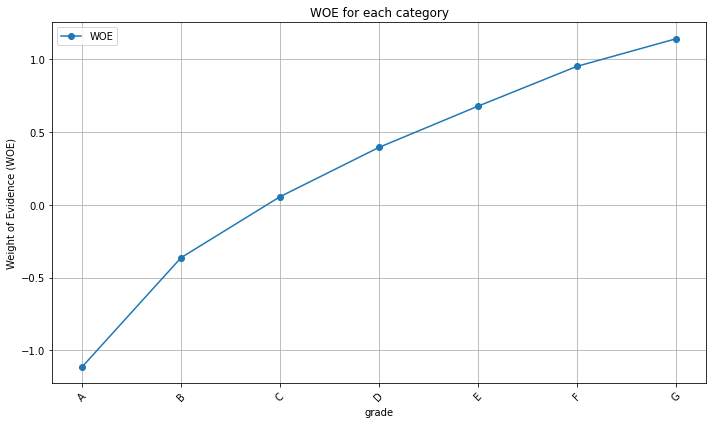

In [29]:
plot_woe(df_woe_grade)

In [30]:
import math

def plot_woe_grid(data, categorical_vars, target):
    """
    Plot WOE (Weight of Evidence) for each category in the specified categorical variables.

    Parameters:
    data (DataFrame): Input DataFrame containing the data.
    categorical_vars (list): List of categorical variable names.
    target (str): Name of the target variable.

    Returns:
    None
    """
    num_plots = len(categorical_vars)
    num_rows = math.ceil(num_plots / 4)
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))

    for i, var in enumerate(categorical_vars):
        row = i // 4
        col = i % 4
        ax = axes[row, col] if num_rows > 1 else axes[col]
        
        woe_iv_df = calculate_woe_iv(data, var, target)
        ax.plot(woe_iv_df.index, woe_iv_df['woe'], marker='o', linestyle='-', label='WOE')
        ax.set_xlabel(var)
        ax.set_ylabel('Weight of Evidence (WOE)')
        ax.set_title('WOE for {}'.format(var))
        ax.legend()
        ax.grid(True)

    # Remove empty subplots
    for i in range(num_plots, num_rows * 4):
        row = i // 4
        col = i % 4
        fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

    plt.tight_layout()
    plt.show()

# Sample usage
# Replace df with your DataFrame, categorical_vars with the list of categorical variables, and 'target' with the target variable
# plot_woe_grid(df, categorical_vars=['categorical_var1', 'categorical_var2'], target='target_variable')


/Users/leisun/coding/credit_risk_modelling/.env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


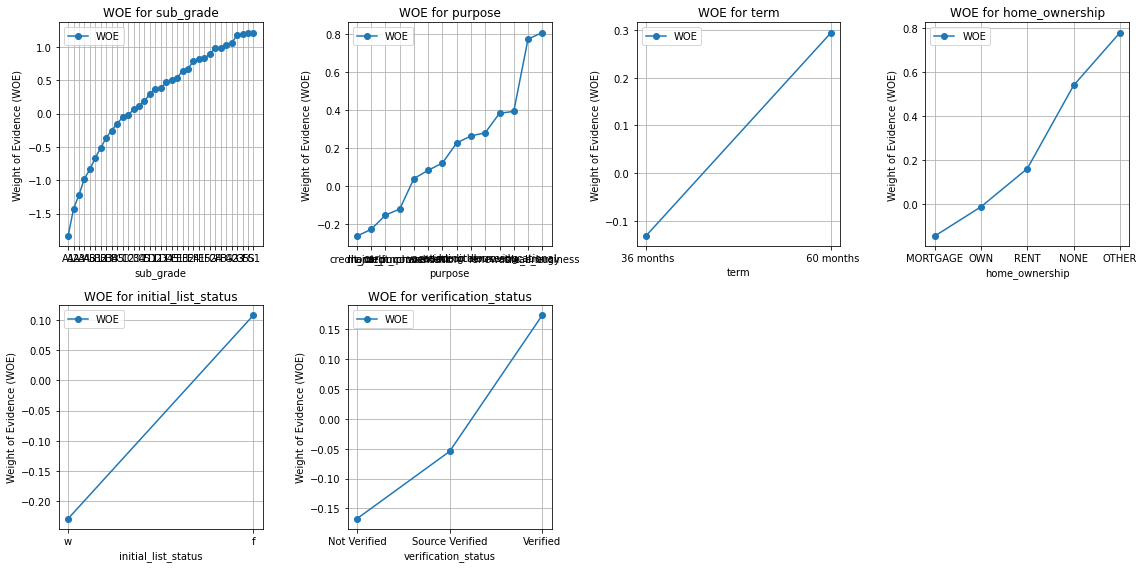

In [31]:
plot_woe_grid(df, categorical_vars=cat_cols, target='label')

## Creating Bins

In [32]:

import numpy as np

def optimize_woe(data, attribute, target, max_bins=10):
    """
    Optimize binning for a numeric attribute by maximizing the difference in WOE.

    Parameters:
    data (DataFrame): Input DataFrame containing the data.
    attribute (str): Name of the numeric attribute to be optimized.
    target (str): Name of the target variable.
    max_bins (int): Maximum number of bins to consider (default is 10).

    Returns:
    optimal_bins (list): List of optimal bin boundaries.
    """
    # Get the unique values of the attribute and sort them
    unique_values = sorted(data[attribute].unique())
    
    # Initialize with each unique value as a bin boundary
    initial_bins = [[val] for val in unique_values]
    
    # Calculate WOE for the initial bins
    initial_woe = []
    for bin_boundaries in initial_bins:
        subset = data[data[attribute].apply(lambda x: any(x <= boundary for boundary in bin_boundaries))]
        woe = calculate_woe_iv(subset, attribute, target)['woe'].values[0]
        initial_woe.append(woe)
    
    # Initialize the best WOE to the minimum possible
    best_woe = float('-inf')
    optimal_bins = None
    
    # Iterate over the number of bins from 2 to max_bins
    for num_bins in range(2, min(len(unique_values), max_bins) + 1):
        # Generate all possible bin combinations with num_bins
        bin_combinations = np.array_split(unique_values, num_bins)
        
        # Calculate WOE for each bin combination
        current_woe = []
        for bin_boundaries in bin_combinations:
            subset = data[data[attribute].apply(lambda x: any(x <= boundary for boundary in bin_boundaries))]
            woe = calculate_woe_iv(subset, attribute, target)['woe'].values[0]
            current_woe.append(woe)
        
        # Calculate the total WOE for this combination
        total_woe = sum(current_woe)
        
        # Update optimal bins if the total WOE is better
        if total_woe > best_woe:
            best_woe = total_woe
            optimal_bins = bin_combinations
    
    return [boundaries[-1] for boundaries in optimal_bins]

# Sample usage
# Replace df with your DataFrame, 'attribute' with the numeric attribute, and 'target' with the target variable
# optimal_bins = optimize_woe(df, 'attribute', 'target', max_bins=10)
# print("Optimal bins:", optimal_bins

In [33]:
import pandas as pd
import numpy as np

def bin_numeric_variables(data, numeric_vars, num_bins=5, binning_method='quantile', optimize=False):
    """
    Bins numeric variables in a DataFrame into discrete categories.

    Parameters:
    data (DataFrame): Input DataFrame containing the data.
    numeric_vars (list): List of numeric variable names to be binned.
    num_bins (int): Number of bins to create (default is 5).
    binning_method (str): Binning method, either 'quantile' (default) or 'equal_width'.
    optimize_woe (bool): Whether to optimize binning based on WOE (default is False).

    Returns:
    binned_data (DataFrame): DataFrame with binned numeric variables.
    """
    binned_data = data.copy()

    for var in numeric_vars:
        if optimize:
            optimal_bins = optimize_woe(data, var, target='target', max_bins=num_bins)
            bins = np.digitize(data[var], bins=optimal_bins, right=True)
        else:
            if binning_method == 'quantile':
                bins, bin_edges = pd.qcut(data[var], q=num_bins, labels=False, retbins=True, duplicates='drop')
            elif binning_method == 'equal_width':
                bins, bin_edges = pd.cut(data[var], bins=num_bins, labels=False, retbins=True)
            else:
                raise ValueError("Invalid binning method. Choose either 'quantile' or 'equal_width'.")
            
            # Create bin labels based on bin boundaries
            bin_labels = [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(len(bin_edges) - 1)]
            binned_data[var] = pd.cut(data[var], bins=bin_edges, labels=bin_labels, include_lowest=True)
    
    return binned_data

# Sample usage
# Replace df with your DataFrame, numeric_vars with the list of numeric variables to be binned
# binned_data = bin_numeric_variables(df, numeric_vars=['age', 'income'], num_bins=5, binning_method='quantile', optimize_woe=True)
# print(binned_data)


In [79]:
X_train_new = bin_numeric_variables(X_train, num_cols, optimize=False)
X_train_new = X_train_new[cat_cols+num_cols]
X_train_new = pd.concat([X_train_new, y_train], axis = 1)

In [80]:
num_cols

['total_rec_prncp',
 'last_pymnt_d',
 'int_rate',
 'out_prncp',
 'total_rec_late_fee',
 'last_credit_pull_d',
 'issue_d',
 'inq_last_6mths',
 'annual_inc',
 'revol_util',
 'dti',
 'earliest_cr_line',
 'early_dlq',
 'total_rev_hi_lim',
 'total_rec_int',
 'total_acc']

In [81]:
df_woe_total_rec_prncp = calculate_woe_iv(X_train_new, "total_rec_late_fee", "label")
df_woe_total_rec_prncp

,positive,total,proportion_positive,proportion_negative,woe,iv
total_rec_late_fee,,,,,,
0.00-358.68,35637,326161,1.0,1.0,0.0,0.0


In [82]:
df.total_rec_late_fee.describe()

count    465945.000000
mean          0.649031
std           5.261711
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64

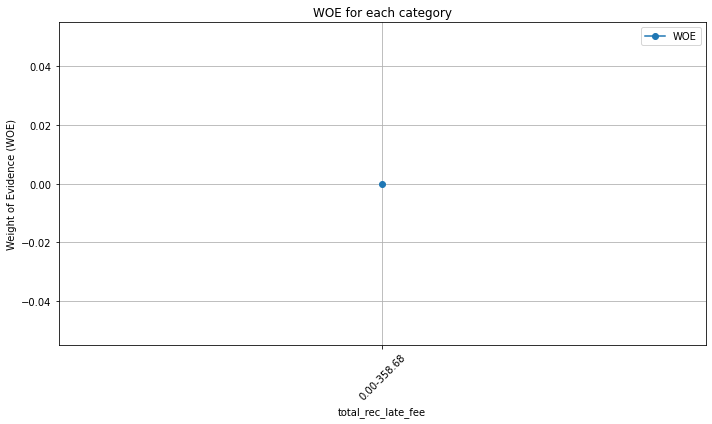

In [83]:
plot_woe(df_woe_total_rec_prncp)

/Users/leisun/coding/credit_risk_modelling/.env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/leisun/coding/credit_risk_modelling/.env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


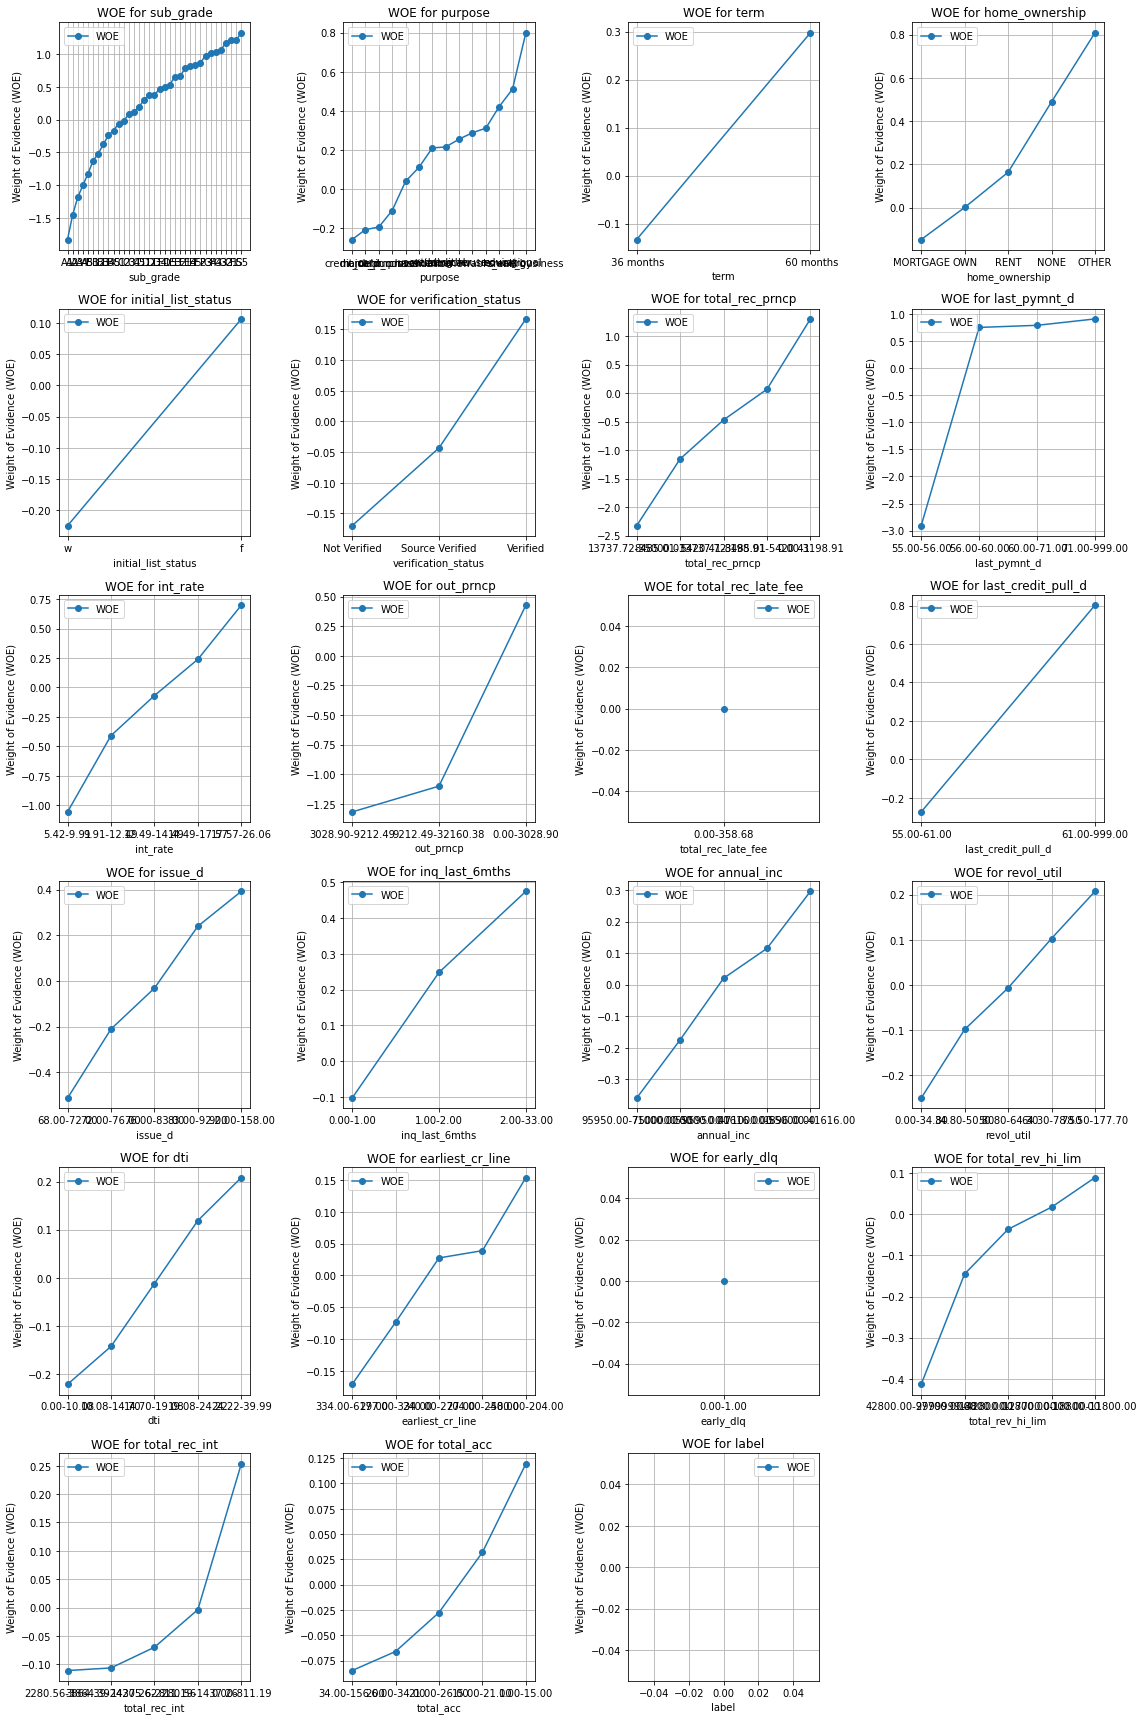

In [84]:
plot_woe_grid(X_train_new, categorical_vars=X_train_new.columns.tolist(), target='label')

In [85]:
further_drop_cols = ['total_rec_late_fee', 'early_dlq', 'label']

In [86]:
X_train_new.drop(further_drop_cols, axis = 1, inplace = True)

In [87]:
X_train_new.head()

,sub_grade,purpose,term,home_ownership,initial_list_status,verification_status,total_rec_prncp,last_pymnt_d,int_rate,out_prncp,last_credit_pull_d,issue_d,inq_last_6mths,annual_inc,revol_util,dti,earliest_cr_line,total_rev_hi_lim,total_rec_int,total_acc
465534,B3,debt_consolidation,36 months,MORTGAGE,w,Source Verified,8485.01-13737.72,60.00-71.00,9.91-12.49,0.00-3028.90,61.00-999.00,76.00-83.00,1.00-2.00,95950.00-7500000.00,64.30-78.50,10.08-14.70,240.00-277.00,11800.00-18800.00,811.19-1437.26,15.00-21.00
180395,D5,debt_consolidation,60 months,RENT,f,Verified,13737.72-35000.03,71.00-999.00,17.57-26.06,0.00-3028.90,61.00-999.00,83.00-92.00,1.00-2.00,95950.00-7500000.00,0.00-34.80,0.00-10.08,334.00-619.00,27700.00-42800.00,1437.26-2280.56,21.00-26.00
183818,B4,debt_consolidation,36 months,RENT,f,Verified,13737.72-35000.03,55.00-56.00,12.49-14.49,0.00-3028.90,55.00-61.00,92.00-158.00,0.00-1.00,95950.00-7500000.00,64.30-78.50,19.08-24.22,334.00-619.00,42800.00-9999999.00,2280.56-3864.39,26.00-34.00
149670,A1,debt_consolidation,36 months,MORTGAGE,w,Verified,13737.72-35000.03,55.00-56.00,5.42-9.91,0.00-3028.90,55.00-61.00,83.00-92.00,0.00-1.00,95950.00-7500000.00,34.80-50.80,0.00-10.08,334.00-619.00,42800.00-9999999.00,1437.26-2280.56,34.00-156.00
145587,C1,debt_consolidation,36 months,MORTGAGE,f,Verified,3198.91-5420.41,71.00-999.00,12.49-14.49,0.00-3028.90,55.00-61.00,83.00-92.00,0.00-1.00,41616.00-55000.00,0.00-34.80,14.70-19.08,240.00-277.00,11800.00-18800.00,0.00-811.19,34.00-156.00


# Training Model

In [91]:
X_train_new = pd.get_dummies(X_train_new)

In [99]:
y_train_new = y_train.to_numpy().reshape(-1, )

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

reg = LogisticRegression(max_iter = 2000, class_weight='balanced') #set class weight to balanced to handle unbalanced data


# define cross-validation criteria
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(reg, X_train_new, y_train_new, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

In [101]:
# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

# fit the pipeline on the whole training set
reg.fit(X_train_new, y_train_new)

Mean AUROC: 0.9702
Gini: 0.9404


LogisticRegression(class_weight='balanced', max_iter=2000)

In [102]:
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = X_train_new.columns.tolist())

In [103]:
# Create a new column in the dataframe, called 'Coefficients'
summary_table['Coefficients'] = np.transpose(reg.coef_)

In [105]:
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)

In [106]:
X_test_new = pd.get_dummies(X_test[X_train_new.columns.tolist()])

# make preditions on our test set
y_hat_test = reg.predict(X_test_new)
# get the predicted probabilities
y_hat_test_proba = pipeline.predict_proba(X_test)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]

# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = X_test.index

# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], 
                                 y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# calculate Gini from AUROC
Gini = AUROC * 2 - 1
# print AUROC and Gini
print('AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (Gini))

# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# get the values required to plot a PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], 
                                                       y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve')

NameError: name 'pipeline' is not defined

In [109]:
X_train_new.columns.tolist()

['sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'term_ 36 months',
 'term_ 60 months',
 'home_ownership_ANY',
 'home_ownership_MO